In [1]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#正态检验
ss.normaltest(np.random.randn(20))

NormaltestResult(statistic=0.3667337676986294, pvalue=0.8324626825905359)

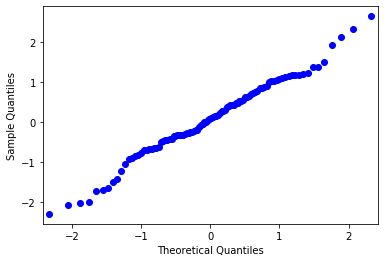

In [3]:
from statsmodels.graphics.api import qqplot
qqplot(ss.norm.rvs(size=100))#QQ图
plt.show()

In [4]:
#卡方检验
ss.chi2_contingency([[15,95],[85,5]],False)

(129.29292929292927,
 5.8513140262808924e-30,
 1,
 array([[55., 55.],
        [45., 45.]]))

In [5]:
#t独立分布检验
ss.ttest_ind(ss.norm.rvs(size=100),ss.norm.rvs(size=200))

Ttest_indResult(statistic=1.8066518259480293, pvalue=0.07182521408521217)

In [6]:
#方差检验
ss.f_oneway([49,50,39,40,43],[28,32,30,26,34],[38,40,45,42,48])

F_onewayResult(statistic=17.619417475728156, pvalue=0.0002687153079821641)

In [7]:
#相关系数分析
s1 = pd.Series([0.1,0.2,1.1,2.4,1.3,0.3,0.5])
s2 = pd.Series([0.5,0.4,1.2,2.5,1.1,0.7,0.1])
df = pd.DataFrame([s1,s2]).T

In [8]:
s1.corr(s2)

0.9333729600465923

In [9]:
df.corr()

,0,1
0,1.000000,0.933373
1,0.933373,1.000000


In [10]:
#回归分析
from sklearn.linear_model import LinearRegression
x = np.arange(10).reshape((10,1))
y = x * 3 + 4 +np.random.random((10,1))
reg = LinearRegression().fit(x,y)
y_pre = reg.predict(x)
print(reg.coef_)
print(reg.intercept_)

[[3.04974539]]
[4.34494812]


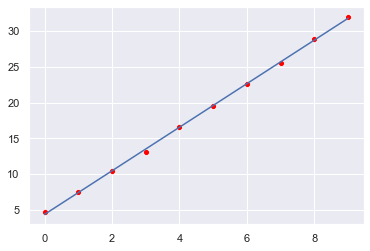

In [15]:
sns.scatterplot(x.reshape(1,10)[0],y.reshape(1,10)[0],color='red')
sns.lineplot(x.reshape(1,10)[0],y_pre.reshape(1,10)[0])

In [17]:
#PCA降维——奇异值分解
from sklearn.decomposition import PCA
df = pd.DataFrame(np.array([np.array([2.5,0.5,2.2,1.9,3.1,2.3,2,1,1.5,1.1]),
                            np.array([2.4,0.7,2.9,2.2,3,2.7,1.6,1.1,1.6,0.9])]))
lower_dim = PCA(n_components=1)
lower_dim.fit(df.T)
print(lower_dim.explained_variance_ratio_)
print(lower_dim.explained_variance_)
print(lower_dim.fit_transform(df.T))

[0.96318131]
[1.28402771]
[[-0.82797019]
 [ 1.77758033]
 [-0.99219749]
 [-0.27421042]
 [-1.67580142]
 [-0.9129491 ]
 [ 0.09910944]
 [ 1.14457216]
 [ 0.43804614]
 [ 1.22382056]]


In [13]:
#一般线性PCA函数
from scipy import linalg
def pca(data_mat,topNfeat=100000):
    mean_vals = np.mean(data_mat,axis=0)
    mid_mat = data_mat-mean_vals
    cov_mat = np.cov(mid_mat,rowvar=False)
    eig_vals,eig_vects = linalg.eig(np.mat(cov_mat))
    eig_val_index = np.argsort(eig_vals)[-1:]
    eig_vects = eig_vects[:,eig_val_index]
    low_dim_mat = np.dot(mid_mat,eig_vects)
    return low_dim_mat,eig_vals
pca(df)

(array([[-0.82797019],
        [ 1.77758033],
        [-0.99219749],
        [-0.27421042],
        [-1.67580142],
        [-0.9129491 ],
        [ 0.09910944],
        [ 1.14457216],
        [ 0.43804614],
        [ 1.22382056]]),
 array([0.0490834 +0.j, 1.28402771+0.j]))